# Nursery Scenario

Number of Omega-automaton states (including the trap state): 47


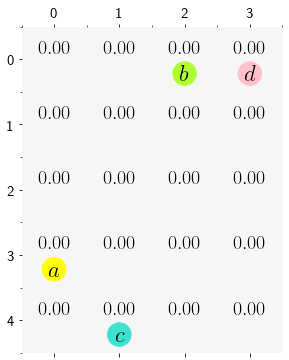

In [1]:
%matplotlib inline
from mdp import GridMDP
from oa import OmegaAutomaton
import numpy as np 
from csrl import ControlSynthesis

ltl = ('G ('
    '(!d) & '
    '((b & (!(X b)))->(X ((!b) U (a|c)))) & '
    '(((!b) & (X b) & (!(X X b)))->((!a) U c)) & '
    '(a->(X ((!a) U b))) & '
    '(c->((!a) U b)) & '
    '((b & (X b))->(F a))'
')')
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

shape = (5,4)
structure = np.array([
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E']
])
label = np.array([
[(),    (),    ('b',),('d',)],
[(),    (),    (),    ()],
[(),    (),    (),    ()],
[('a',),(),    (),    ()],
[(),    ('c',),(),    ()]
],dtype=np.object)
lcmap={
    ('a',):'yellow',
    ('b',):'greenyellow',
    ('c',):'turquoise',
    ('d',):'pink'
}
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,lcmap=lcmap)
grid_mdp.plot()

discount=0.9999
csrl = ControlSynthesis(grid_mdp,oa,discount)

In [ ]:
Q=csrl.q_learning(start=(4,1),T=2000,K=500000)

In [ ]:
value=np.max(Q,axis=4)
csrl.plot(value)

In [ ]:
policy=np.argmax(Q,axis=4)
csrl.plot(value,policy,iq=(0,2),save='nursery_scenario_policy_cb.eps')
csrl.plot(value,policy,iq=(0,41),save='nursery_scenario_policy_bc.eps')
csrl.plot(value,policy,iq=(0,12),save='nursery_scenario_policy_ba.eps')
csrl.plot(value,policy,iq=(0,9),save='nursery_scenario_policy_ab.eps')

In [ ]:
episode=csrl.simulate(policy,start=(4,1),T=1000)